# Exercici 1 & 2

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0). Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.


Make at least three different classification models to try to predict DelayedFlights.csv's flight delay (ArrDelay) as best as possible. Consider if the flight arrived late or not (ArrDelay > 0). Compare the classification models using accuracy, a confusion matrix and other more advanced metrics.

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [83]:
df = pd.read_csv("DelayedFlights.csv", index_col = 0)

C:\Users\Nuria\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The data consists of flight arrival and departure details for all commercial flights within the USA. Variable descriptions:
* 1 Year; 2008 
* 2 Month; 1-12 
* 3 DayofMonth; 1-31 
* 4 DayOfWeek; 1 (Monday) - 7 (Sunday) 
* 5 DepTime; actual departure time (local, hhmm) 
* 6 CRSDepTime; scheduled departure time (local, hhmm) 
* 7 ArrTime; actual arrival time (local, hhmm) 
* 8 CRSArrTime; scheduled arrival time (local, hhmm) 
* 9 UniqueCarrier; unique carrier code 
* 10 FlightNum; flight number 
* 11 TailNum; plane tail number 
* 12 ActualElapsedTime; in minutes 
* 13 CRSElapsedTime; in minutes 
* 14 AirTime; in minutes 
* 15 ArrDelay; arrival delay, in minutes 
* 16 DepDelay; departure delay, in minutes 
* 17 Origin; origin IATA airport code 
* 18 Dest; destination IATA airport code 
* 19 Distance; in miles 
* 20 TaxiIn; taxi in time, in minutes 
* 21 TaxiOut; taxi out time in minutes 
* 22 Cancelled; was the flight cancelled? 
* 23 CancellationCode; reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
* 24 Diverted; 1 = yes, 0 = no 
* 25 CarrierDelay; in minutes 
* 26 WeatherDelay; in minutes 
* 27 NASDelay; in minutes 
* 28 SecurityDelay; in minutes 
* 29 LateAircraftDelay; in minutes

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


We are first deleting some columns that are not needed. The Year column, that is always 2008; the Cancelled column, as well as the rows that have cancelled = 1, because those are of no interest if we are studying delay; the CancellationCode column, for the same reasons; the Diverted column, as well as the rows that have diverted = 1, because those are of no interest if we are studying delay; and the Origin and Dest because they add no real information that the column Distance doesn't provide, as well as the TailNum column.

In [84]:
#remove the Year column
df = df.drop(["Year"], axis = 1)

#keep only rows that were not cancelled
df = df[df.Cancelled == 0]

#remove the Cancelled row
df = df.drop(["Cancelled"], axis = 1)

#remove CancellationCode column
df = df.drop(["CancellationCode"], axis = 1)

#keep only rows that were not diverted
df = df[df.Diverted == 0]

#remove the Diverted row
df = df.drop(["Diverted"], axis = 1)

#remove the Origin, Dest, and TailNum row
df = df.drop(["Origin", "Dest", "TailNum"], axis = 1)

df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,...,-14.0,8.0,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,...,2.0,19.0,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,96.0,...,14.0,8.0,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,...,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
5,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,...,11.0,25.0,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN


We are now going to take care of the NaN values as well.

In [5]:
df.isna().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Distance                  0
TaxiIn                    0
TaxiOut                   0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

The large number of NaN values coincide with an arrival delay of 15 or less, as those atributes were only filled in when there was a greater delay than that. Hence, the best option we have is to fill those NaN with 0.

In [85]:
#filling NaN values in these columns with their median
df["CarrierDelay"] = df["CarrierDelay"].fillna(0)
df["WeatherDelay"] = df["WeatherDelay"].fillna(0)
df["NASDelay"] = df["NASDelay"].fillna(0)
df["SecurityDelay"] = df["SecurityDelay"].fillna(0)
df["LateAircraftDelay"] = df["LateAircraftDelay"].fillna(0)

Next we will transform the ArrDelay into categorical data. If there is delay (ArrDelay > 0), it will be True, and if there is no delay (ArrDelay <= 0), it will be False. This new column will be called Late. 

In [86]:
df["Late"] = df["ArrDelay"] > 0
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Late
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,...,8.0,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0,False
1,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,...,19.0,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0,True
2,1,3,4,628.0,620,804.0,750,WN,448,96.0,...,8.0,515,3.0,17.0,0.0,0.0,0.0,0.0,0.0,True
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,...,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,True
5,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,...,25.0,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0,True


In [37]:
df.Punctual.value_counts()

False    1750455
True      177916
Name: Punctual, dtype: int64

Having created the new column, we will now create our models. We will not use all of the dataset as it is too big, and not all of the columns have any correlation to the one we want to predict. 

[Text(0.5, 1, 'Correlations')]

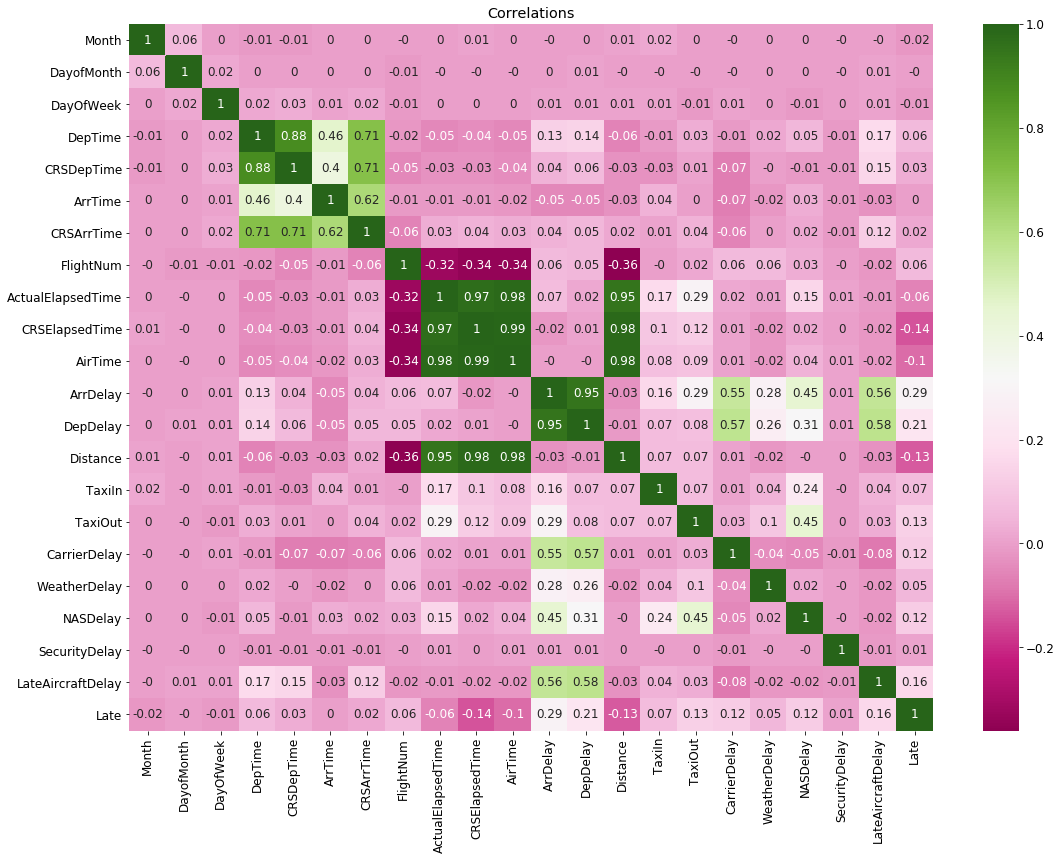

In [51]:
plt.figure(figsize = (18, 13))
sns.heatmap(df.corr().round(2), annot = True, cmap = "PiYG").set(
    title = "Correlations")

We will pick DepDelay, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, and LateAircraftDelay. We will also take a sample of 1% of the dataset as it is very big.

In [87]:
#making a sample of 1% of the dataset
random_df = df.sample(frac = 0.01, random_state = 0)

In [73]:
X = random_df[["DepDelay", "TaxiIn", "TaxiOut", "CarrierDelay", "WeatherDelay", "NASDelay", 
               "LateAircraftDelay"]]
y = random_df.Late

In [42]:
y.value_counts()

False    17488
True      1796
Name: Punctual, dtype: int64

In [18]:
from sklearn.neural_network import MLPClassifier
#Create the classifier 
mlp = MLPClassifier(hidden_layer_sizes = (10))

#Train the model
mlp.fit(X, y)

#Predict
pred_nn = mlp.predict(X)

In [55]:
print("Confusion matrix for the neural network:\n", confusion_matrix(y, pred_nn))

Confusion matrix for the neural network:
 [[  211  1868]
 [  116 17089]]


True positive: 211

True negative: 17089

False positive: 1868

False negative: 116

In [22]:
tn, fp, fn, tp = confusion_matrix(y, pred_nn).ravel()
se = tp / (tp + fn)
sp = tn / (tn + fp)
print("Sensitivity:", se.round(2))
print("Specificity:", sp.round(2))

Sensitivity: 0.99
Specificity: 0.12


In [57]:
print("Classification report for the neural network:\n", classification_report(y, pred_nn))

Classification report for the neural network:
               precision    recall  f1-score   support

       False       0.65      0.10      0.18      2079
        True       0.90      0.99      0.95     17205

    accuracy                           0.90     19284
   macro avg       0.77      0.55      0.56     19284
weighted avg       0.87      0.90      0.86     19284



This model shows a large percentage of correct predictions, 90%, however, it's sensitivity is very low. Since the dataset is very imbalanced, this model is not much better than a model that always classifies as negative. 

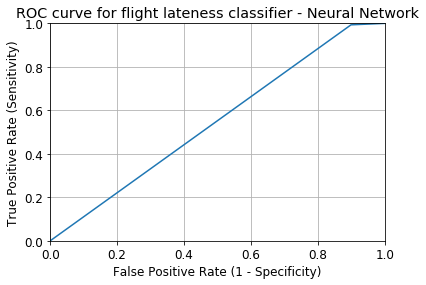

In [66]:
#roc_curve returns 3 objects fpr, tpr, thresholds
#fpr: false positive rate
#tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y, pred_nn)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for flight lateness classifier - Neural Network')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

A Receiver Operating Characteristic (ROC) curve allows us to see how sensitivity and specificity are affected when changing the classification threshold. That means the limit where the classifier predicts as one type or another, in this case, if the flight is late or not. By default, it is set at 0.5 on the model.

In [18]:
print("Area under the curve:", metrics.roc_auc_score(y, pred_nn).round(2))

Area under the curve: 0.55


The Area Under the curve (AUC) of the ROC summarizes the performance of the model, and goes from 0 to 1, where 1 is a perfect model. this, unlike the accuracy score, is a useful metric in the case of having a very imbalanced class, such as our case. We can see that although the accuracy is score is 0.90, the AUC is 0.55, which shows that the model actually performs quite poorly, and is not much better than a dummy classifier. 

Support Vector Machine's (SVM) objective is to sort the data, selecting a hyperplane that maximizes the segregation. A **hyperplane** is a partition that separates data points that have different class membership. The data points closest to the hyperplane are called **support vectors**.

In [20]:
from sklearn import svm
#Create a SVM classifier
svc = svm.SVC(class_weight = "balanced")

#Train the model
svc.fit(X, y)

#Predict the response
pred_svc = svc.predict(X)

In [59]:
print("Confusion matrix for the Support Vector Machine:\n", confusion_matrix(y, pred_svc))

Confusion matrix for the Support Vector Machine:
 [[ 2079     0]
 [ 4772 12433]]


In [23]:
tn, fp, fn, tp = confusion_matrix(y, pred_svc).ravel()
se = tp / (tp + fn)
sp = tn / (tn + fp)
print("Sensitivity:", se.round(2))
print("Specificity:", sp.round(2))

Sensitivity: 0.72
Specificity: 1.0


In [62]:
print("Classification report for the SVM:\n", classification_report(y, pred_svc))

Classification report for the SVM:
               precision    recall  f1-score   support

       False       0.30      1.00      0.47      2079
        True       1.00      0.72      0.84     17205

    accuracy                           0.75     19284
   macro avg       0.65      0.86      0.65     19284
weighted avg       0.92      0.75      0.80     19284



This model doesn't make any type 2 error, which is great. It is much less **specific** than the neural network, but it's other metrics improve, such as recall and f1 score. It's accuracy is also lower, but we have the certainty that this model does a much better work at classifying flight lateness.

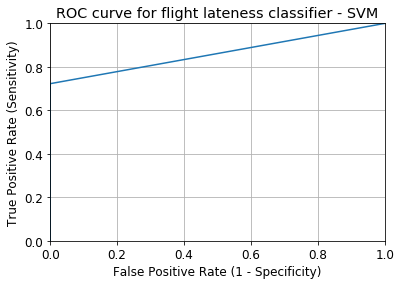

In [71]:
#roc_curve returns 3 objects fpr, tpr, thresholds
#fpr: false positive rate
#tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y, pred_svc)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for flight lateness classifier - SVM')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [70]:
print("Area under the curve:", metrics.roc_auc_score(y, pred_svc).round(2))

Area under the curve: 0.86


This ROC curve shows that the model is better at doing the job of classifying. The AUC is 0.86, which is closer to 1, and a positive sign. 

In [9]:
from sklearn.linear_model import LogisticRegression

# create the model 
log = LogisticRegression()

# train the model
log.fit(X,y)

#predict
pred_log = log.predict(X)

In [10]:
print("Confusion matrix for the Logistic Regression:\n", confusion_matrix(y, pred_log))

Confusion matrix for the Logistic Regression:
 [[  211  1868]
 [  135 17070]]


In [17]:
tn, fp, fn, tp = confusion_matrix(y, pred_log).ravel()
se = tp / (tp + fn)
sp = tn / (tn + fp)
print("Sensitivity:", se.round(2))
print("Specificity:", sp.round(2))

Sensitivity: 0.99
Specificity: 0.1


In [12]:
print("Classification report for the Logistic Regression:\n", classification_report(y, pred_log))

Classification report for the Logistic Regression:
               precision    recall  f1-score   support

       False       0.61      0.10      0.17      2079
        True       0.90      0.99      0.94     17205

    accuracy                           0.90     19284
   macro avg       0.76      0.55      0.56     19284
weighted avg       0.87      0.90      0.86     19284



This model gives very similar results compared to the neural network model, which isn't good results either. 

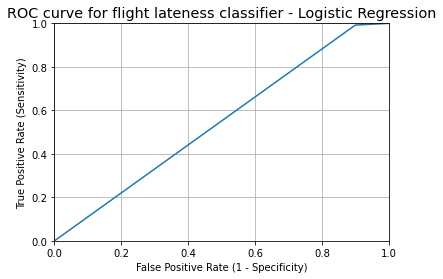

In [25]:
#roc_curve returns 3 objects fpr, tpr, thresholds
#fpr: false positive rate
#tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y, pred_log)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for flight lateness classifier - Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [27]:
print("Area under the curve:", metrics.roc_auc_score(y, pred_log).round(2))

Area under the curve: 0.55


As expected, the ROC curve and the area under it is very similar to the neural network one, as it is very poor. 

# Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

Traian them using the different parameters they admit.

In [29]:
MLPClassifier().get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [9]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV
# cross validator
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

#dictionary of search space
space = dict()
space["activation"] = ["identity", "logistic", "tanh", "relu"]
space["solver"] = ["lbfgs", "sgd", "adam"]
space["learning_rate"] = ["constant", "invscaling", "adaptative"]
space["hidden_layer_sizes"] = [(10,), (5, 5, 5), (5, 10, 5), (8, 8, 8)]

search = GridSearchCV(MLPClassifier(), space, scoring = 'roc_auc', n_jobs = -1, cv = cv)

result = search.fit(X, y)

print('Best Hyperparameters: ', result.best_params_)

C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 384, in _fit
    self._validate_

Best Hyperparameters:  {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'adam'}


In [74]:
mlp = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (10,), learning_rate = 'constant',
                    solver = 'adam')

#Train the model
mlp.fit(X, y)

#Predict
pred_nn = mlp.predict(X)

We were unable to run a grid search for the SVM because of lack of computer power. Hence, we will be changing some hyperparameters where we see it necessary.

In [79]:
#Create a SVM classifier
svc = svm.SVC(class_weight = "balanced", kernel = "linear")

#Train the model
svc.fit(X, y)

#Predict the response
pred_svc = svc.predict(X)

In [77]:
from sklearn.linear_model import LogisticRegression
# cross validator
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

#dictionary of search space
space = dict()
space["penalty"] = ["none", "l2", "l1", "elasticnet"]
space["solver"] = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
space["multi_class"] = ["auto", "ovr", "multinomial"]
space["dual"] = [True, False]
space["fit_intercept"] = [True, False]

search = GridSearchCV(LogisticRegression(class_weight = "balanced"), space, scoring = 'roc_auc', 
                      n_jobs = -1, cv = cv)

result = search.fit(X, y)

print('Best Hyperparameters: ', result.best_params_)

C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5220 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 452, in _check_solver
    raise ValueError(

Best Hyperparameters:  {'dual': False, 'fit_intercept': True, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}


In [78]:
# create the model 
log = LogisticRegression(dual = False, fit_intercept = True, multi_class = 'multinomial', 
                         penalty = 'l2', solver = 'lbfgs')

# train the model
log.fit(X,y)

#
pred_log = log.predict(X)

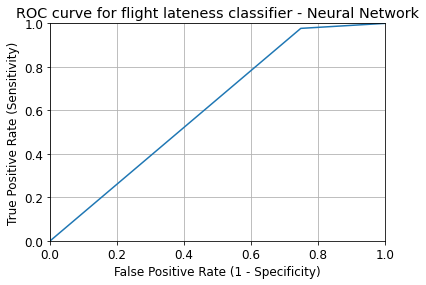

In [80]:
#roc_curve returns 3 objects fpr, tpr, thresholds
#fpr: false positive rate
#tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y, pred_nn)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for flight lateness classifier - Neural Network')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

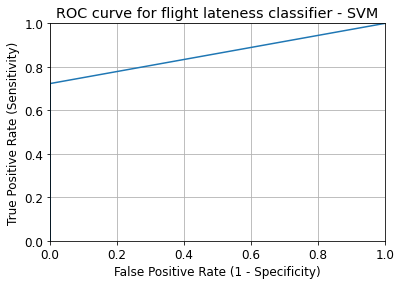

In [81]:
fpr, tpr, thresholds = metrics.roc_curve(y, pred_svc)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for flight lateness classifier - SVM')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

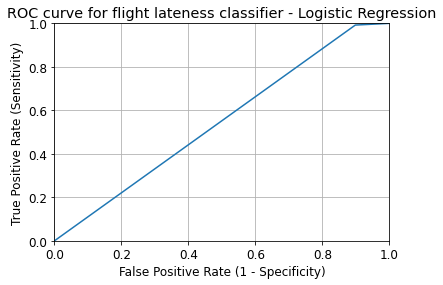

In [82]:
fpr, tpr, thresholds = metrics.roc_curve(y, pred_log)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for flight lateness classifier - Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [19]:
print("AUC of the Neural Network:", metrics.roc_auc_score(y, pred_nn).round(2))
print("AUC of the SVM:", metrics.roc_auc_score(y, pred_svc).round(2))
print("AUC of the Logistic Regression:", metrics.roc_auc_score(y, pred_log).round(2))

AUC of the Neural Network: 0.58
AUC of the SVM: 0.86
AUC of the Logistic Regression: 0.55


The above grid searches were performed to maximize ROC and AUC, and we can see a somewhat improvement in the neural network model, but none in the other two. 

# Exercici 4

Compara el seu rendiment utilitzant l’aproximació train/test o cross-validation.

Compare their performance using the approximation train/test or cross validation.

In [22]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
#Create the neural network model
mlp = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (10,), learning_rate = 'constant',
                    solver = 'adam')

#Train the model
mlp.fit(X_train, y_train)

#Make predictions using the test subset
pred_nn = mlp.predict(X_test)

In [24]:
#Create a SVM classifier
svc = svm.SVC(class_weight = "balanced", kernel = "linear")

#Train the model
svc.fit(X_train, y_train)

#Predict the response
pred_svc = svc.predict(X_test)

In [25]:
#Create the logistic regression model 
log = LogisticRegression(dual = False, fit_intercept = True, multi_class = 'multinomial', 
                         penalty = 'l2', solver = 'lbfgs')

#Train the model with data
log.fit(X_train, y_train)

#predict
pred_log = log.predict(X_test)

In [41]:
from sklearn.model_selection import cross_val_score

#cross validation for the neural network
print(cross_val_score(mlp, X, y, scoring = "accuracy"))
print(cross_val_score(mlp, X, y, scoring = "roc_auc"))

[0.8942183  0.90095929 0.89266269 0.90251491 0.89522822]
[0.91130255 0.92059728 0.90872091 0.91866114 0.91351211]


In [43]:
#cross validation for the SVM
print(cross_val_score(svc, X, y, scoring = "accuracy"))
print(cross_val_score(svc, X, y, scoring = "roc_auc"))

[0.75162043 0.75421312 0.7518797  0.756028   0.75181535]
[0.9010263  0.89584975 0.89018175 0.91091239 0.90826077]


In [45]:
#cross validation for the logistic regression
print(cross_val_score(log, X, y, scoring = "accuracy"))
print(cross_val_score(log, X, y, scoring = "roc_auc"))

[0.89292196 0.89914441 0.89318123 0.89810734 0.8965249 ]
[0.91174406 0.91917216 0.90739708 0.91911802 0.91226983]


In [49]:
mlp.score(X_test, y_test)

0.894054614586934

In [47]:
svc.score(X_test, y_test)


0.7547528517110266

In [48]:
log.score(X_test, y_test)

0.8905979951607328

In [52]:
print("AUC of the Neural Network:", metrics.roc_auc_score(y_test, pred_nn).round(2))
print("AUC of the SVM:", metrics.roc_auc_score(y_test, pred_svc).round(2))
print("AUC of the Logistic Regression:", metrics.roc_auc_score(y_test, pred_log).round(2))

AUC of the Neural Network: 0.59
AUC of the SVM: 0.86
AUC of the Logistic Regression: 0.55


The support vector machine model is still the best out of these three, but still not that good. Some improvement in the models could be made by some variable engineering, such as SMOTE and undersampling.

# Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

Perform some variable engineering process to improve the prediction

In [53]:
from imblearn.over_sampling import SMOTE
#oversampling the minority class using smote
smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [55]:
from imblearn.under_sampling import RandomUnderSampler
#undersampling the majority class
us = RandomUnderSampler(sampling_strategy = "majority")
X_train, y_train = us.fit_resample(X_train, y_train)

In [56]:
mlp = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (10,), learning_rate = 'constant',
                    solver = 'adam')

#Train the model
mlp.fit(X_train, y_train)

#Make predictions using the test subset
pred_nn = mlp.predict(X_test)

In [57]:
#Create a SVM classifier
svc = svm.SVC(class_weight = "balanced", kernel = "linear")

#Train the model
svc.fit(X_train, y_train)

#Predict the response
pred_svc = svc.predict(X_test)

In [58]:
#Create the logistic regression model 
log = LogisticRegression(dual = False, fit_intercept = True, multi_class = 'multinomial', 
                         penalty = 'l2', solver = 'lbfgs')

#Train the model with data
log.fit(X_train, y_train)

#predict
pred_log = log.predict(X_test)

In [60]:
print("AUC of the Neural Network:", metrics.roc_auc_score(y_test, pred_nn).round(2))
print("AUC of the SVM:", metrics.roc_auc_score(y_test, pred_svc).round(2))
print("AUC of the Logistic Regression:", metrics.roc_auc_score(y_test, pred_log).round(2))

AUC of the Neural Network: 0.86
AUC of the SVM: 0.86
AUC of the Logistic Regression: 0.86


In [61]:
print("Accuracy of the Neural Network:", metrics.accuracy_score(y_test, pred_nn).round(2))
print("Accuracy of the SVM:", metrics.accuracy_score(y_test, pred_svc).round(2))
print("Accuracy of the Logistic Regression:", metrics.accuracy_score(y_test, pred_log).round(2))

Accuracy of the Neural Network: 0.77
Accuracy of the SVM: 0.75
Accuracy of the Logistic Regression: 0.77


In [62]:
print("Confusion matrix for the Neural Network:\n", confusion_matrix(y_test, pred_nn))
print("Confusion matrix for the SVM:\n", confusion_matrix(y_test, pred_svc))
print("Confusion matrix for the Logistic Regression:\n", confusion_matrix(y_test, pred_log))

Confusion matrix for the Neural Network:
 [[ 629   24]
 [1280 3853]]
Confusion matrix for the SVM:
 [[ 653    0]
 [1419 3714]]
Confusion matrix for the Logistic Regression:
 [[ 632   21]
 [1283 3850]]


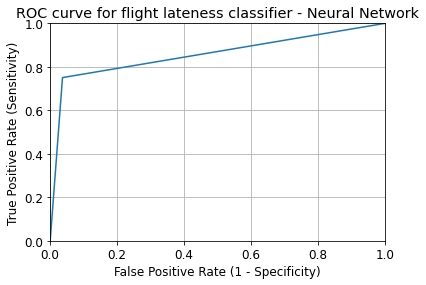

In [64]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_nn)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for flight lateness classifier - Neural Network')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

We can see that after SMOTE and undersampling, the neural network model performance has greatly improved. It's accuracy is smaller, but its AUC is much greater. This model is now a much better one. 

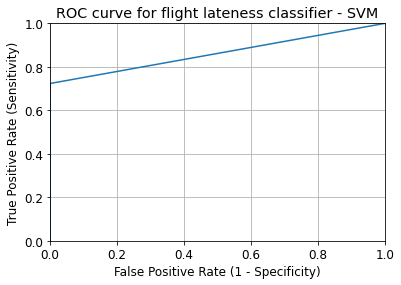

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_svc)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for flight lateness classifier - SVM')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

After all the variable engineering, this model stays the same. It was okay before, and it still is now, but some improvement was expected now. 

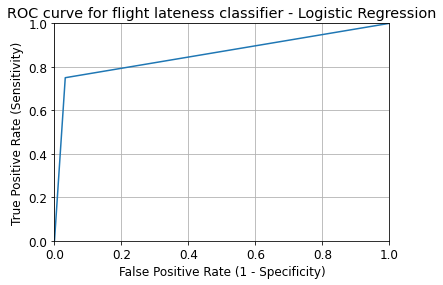

In [66]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_log)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for flight lateness classifier - Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

This model has also improved greatly. It is very telling, however, that it performed so similarly to the neural network model. Even their confusion matrices are very similar.

# Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

Don't use the variable DepDelay when making predictions. 

In [88]:
X = random_df[["TaxiIn", "TaxiOut", "CarrierDelay", "WeatherDelay", "NASDelay", 
               "LateAircraftDelay"]]
y = random_df.Late

In [89]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [90]:
#oversampling the minority class using smote
smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [91]:
#undersampling the majority class
us = RandomUnderSampler(sampling_strategy = "majority")
X_train, y_train = us.fit_resample(X_train, y_train)

In [92]:
mlp = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (10,), learning_rate = 'constant',
                    solver = 'adam')

#Train the model
mlp.fit(X_train, y_train)

#Make predictions using the test subset
pred_nn = mlp.predict(X_test)

In [93]:
#Create a SVM classifier
svc = svm.SVC(class_weight = "balanced", kernel = "linear")

#Train the model
svc.fit(X_train, y_train)

#Predict the response
pred_svc = svc.predict(X_test)

In [94]:
#Create the logistic regression model 
log = LogisticRegression(dual = False, fit_intercept = True, multi_class = 'multinomial', 
                         penalty = 'l2', solver = 'lbfgs')

#Train the model with data
log.fit(X_train, y_train)

#predict
pred_log = log.predict(X_test)

In [95]:
print("AUC of the Neural Network:", metrics.roc_auc_score(y_test, pred_nn).round(2))
print("AUC of the SVM:", metrics.roc_auc_score(y_test, pred_svc).round(2))
print("AUC of the Logistic Regression:", metrics.roc_auc_score(y_test, pred_log).round(2))

AUC of the Neural Network: 0.86
AUC of the SVM: 0.86
AUC of the Logistic Regression: 0.86


In [96]:
print("Accuracy of the Neural Network:", metrics.accuracy_score(y_test, pred_nn).round(2))
print("Accuracy of the SVM:", metrics.accuracy_score(y_test, pred_svc).round(2))
print("Accuracy of the Logistic Regression:", metrics.accuracy_score(y_test, pred_log).round(2))

Accuracy of the Neural Network: 0.76
Accuracy of the SVM: 0.75
Accuracy of the Logistic Regression: 0.76


In [97]:
print("Confusion matrix for the Neural Network:\n", confusion_matrix(y_test, pred_nn))
print("Confusion matrix for the SVM:\n", confusion_matrix(y_test, pred_svc))
print("Confusion matrix for the Logistic Regression:\n", confusion_matrix(y_test, pred_log))

Confusion matrix for the Neural Network:
 [[ 651    2]
 [1411 3722]]
Confusion matrix for the SVM:
 [[ 653    0]
 [1419 3714]]
Confusion matrix for the Logistic Regression:
 [[ 653    0]
 [1415 3718]]


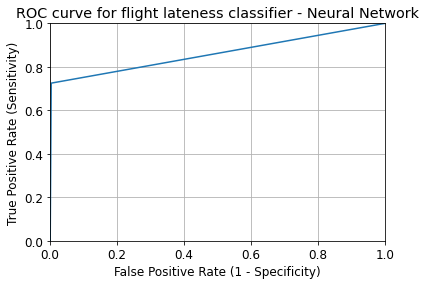

In [98]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_nn)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for flight lateness classifier - Neural Network')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

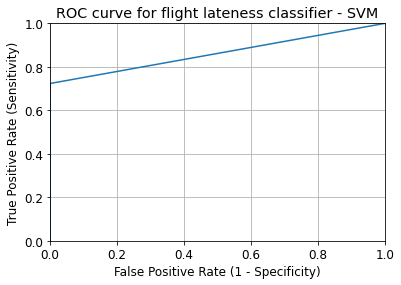

In [99]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_svc)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for flight lateness classifier - SVM')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

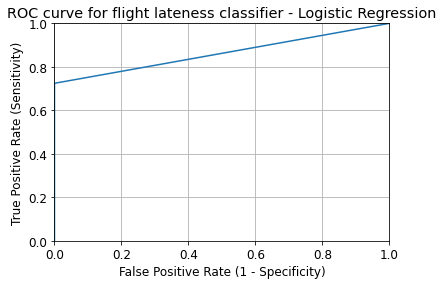

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_log)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for flight lateness classifier - Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Unexpectedly, the metrics of the three models didn't change. Perhaps it is due to the fact that we have used a lot of variables and they complete what is missing when removing DepDelay. 